<a href="https://colab.research.google.com/github/DanishPasricha/Data-Visualization-Project/blob/main/Danish_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
column_names = ["age", "workclass", "fnlwgt", "education", "education-num","marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country","salary-range"]
df = pd.read_csv('adult.data', names=column_names)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary-range
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**Co-Relation Matrix**

Text(0.5, 1.0, 'Correlation Matrix as a Heatmap')

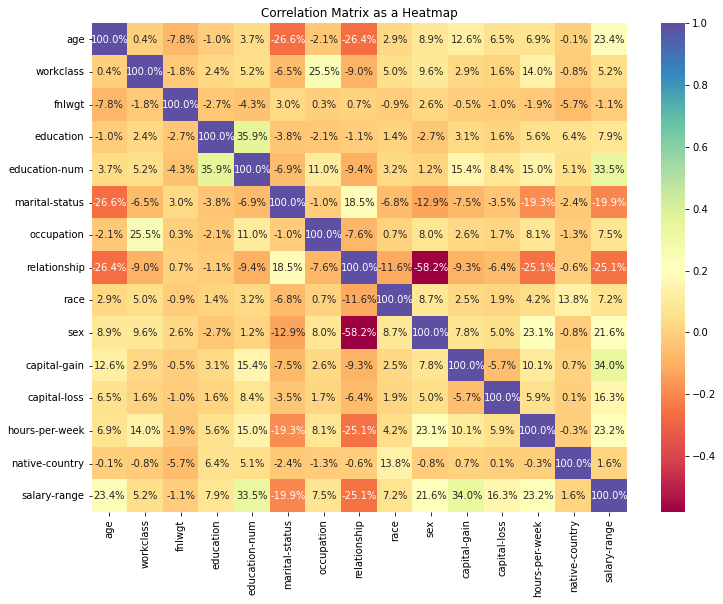

In [ ]:
dataFrameCorelation = df.apply(LabelEncoder().fit_transform)
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(dataFrameCorelation.corr(),ax=ax,cmap="Spectral", annot=True, fmt="0.1%")
ax.set_title('Correlation Matrix as a Heatmap')

## Mosaic Plot

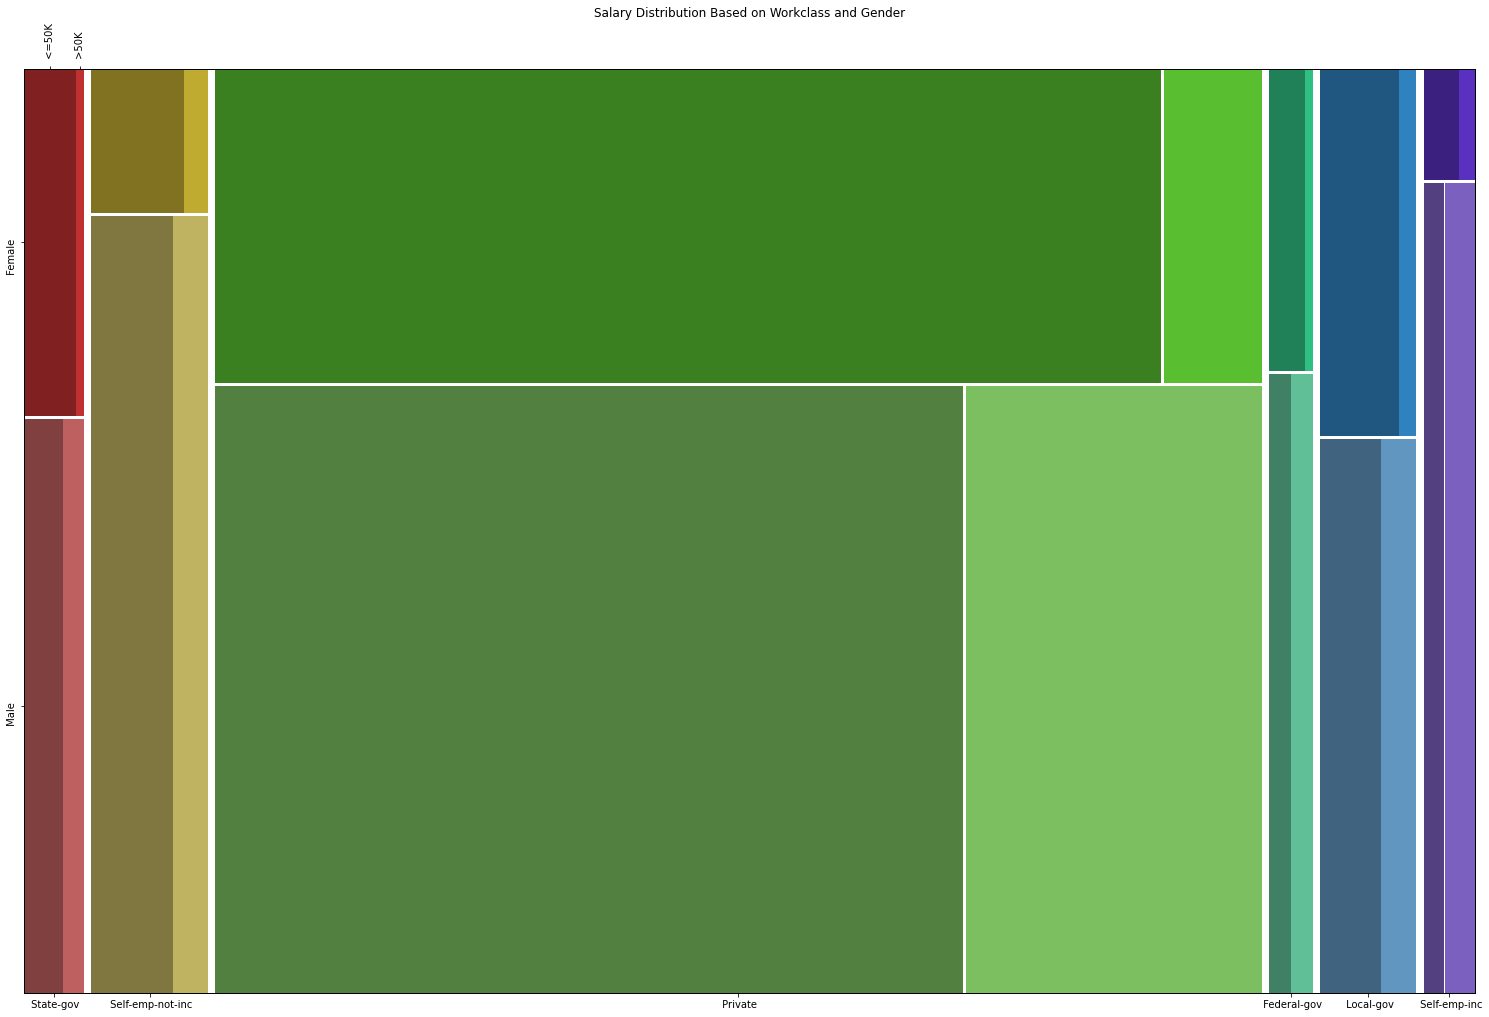

In [ ]:
df = df[df.workclass.isin([' ?',' Without-pay',' Never-worked']) == False]
fig, ax = plt.subplots(figsize=(26,17))
d={}
d[('State-gov','Male')]={'facecolor':'red', 'edgecolor':'black'}
d[('Self-emp-not-inc','Male')]={'facecolor':'red', 'edgecolor':'black'}
d[('Private','Male')]={'facecolor':'red', 'edgecolor':'black'}
d[('Federal-gov','Male')]={'facecolor':'red', 'edgecolor':'black'}
d[('Local-gov','Male')]={'facecolor':'red', 'edgecolor':'black'}
d[('Self-emp-inc','Male')]={'facecolor':'red', 'edgecolor':'black'}
mosaic_plot = mosaic(df,['workclass','sex','salary-range'],ax=ax, labelizer=lambda k: "",label_rotation=[0,90,90],properties = d,title='Salary Distribution Based on Workclass and Gender')          

## Histogram

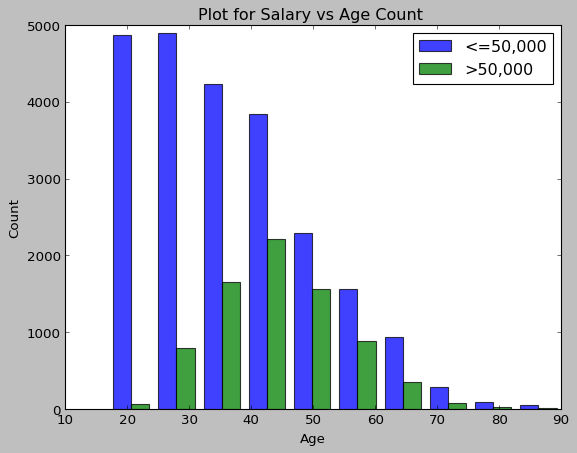

In [ ]:
from matplotlib import style
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    Age_with_less_Salary = df[df['salary-range'] == ' <=50K']['age'].tolist()
    Age_with_More_Salary = df[df['salary-range'] == ' >50K']['age'].tolist()
    plt.ylabel('Count')
    plt.hist([df[df['salary-range'] == ' <=50K']['age'].tolist(), df[df['salary-range'] == ' >50K']['age'].tolist()],bins=10,label=['<=50,000','>50,000'],alpha = 0.75)
    plt.legend(loc='upper right')
    plt.xlabel('Age')
    plt.title('Plot for Salary vs Age Count ')
    plt.style.use('_classic_test_patch')
    plt.show()

## Box and Whisker Plot

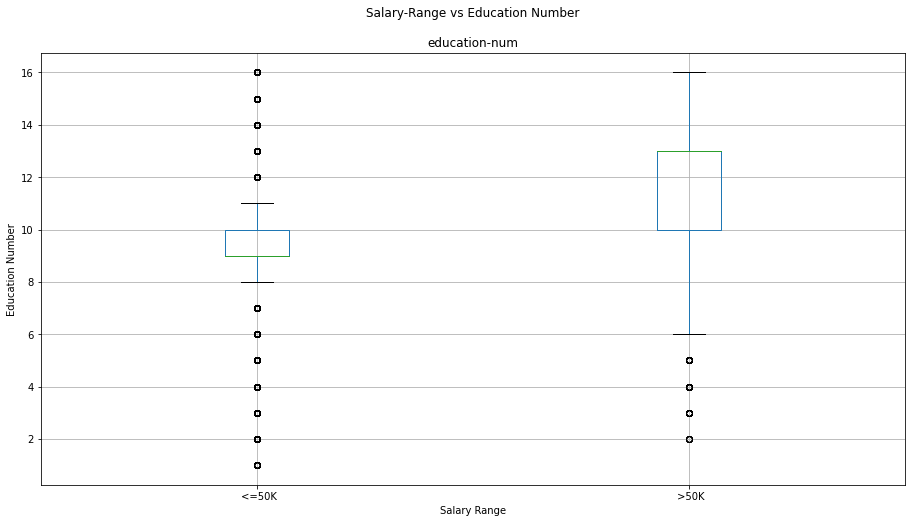

In [ ]:
from matplotlib import style
import warnings
with warnings.catch_warnings():
  warnings.simplefilter("ignore")
  Box_and_Whisker_plot = df.boxplot(column=['education-num'], by=['salary-range'], figsize=(15,8))
  Box_and_Whisker_plot.set_ylabel('Education Number')
  Box_and_Whisker_plot.set_xlabel('Salary Range')
  fig = Box_and_Whisker_plot.get_figure()
  fig.suptitle('Salary-Range vs Education Number')
  

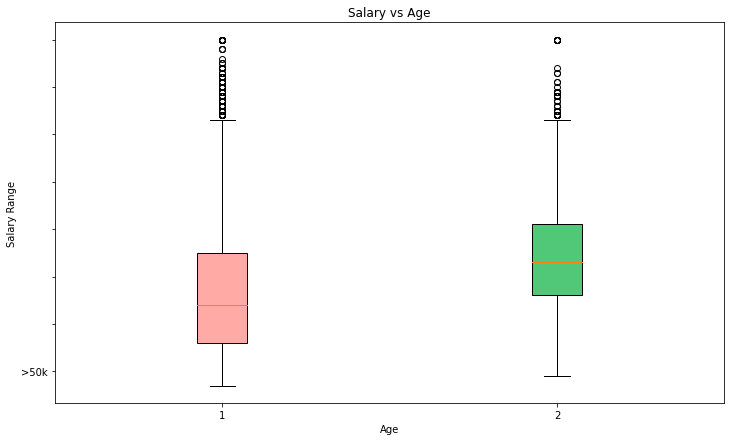

In [ ]:
from matplotlib import style
import warnings
with warnings.catch_warnings():
  warnings.simplefilter("ignore")
  fig,ax = plt.subplots(figsize=(12,7))
  Box_plot = ax.boxplot([df[df['salary-range'] == ' <=50K']['age'].tolist(), df[df['salary-range'] == ' >50K']['age'].tolist()], patch_artist = True)
  for i, j in zip(Box_plot['boxes'], ['#ffaaa5', '#50c878']):
      i.set_facecolor(j)
  ax.set_yticklabels(['<=50k', '>50k'])
  ax.set_xlabel('Age')
  ax.set_ylabel('Salary Range')
  plt.title("Salary vs Age")
  plt.show()

## Count Plot

 White                 26289
 Black                  2908
 Asian-Pac-Islander      973
 Amer-Indian-Eskimo      286
 Other                   248
Name: race, dtype: int64
 Husband           12700
 Not-in-family      7865
 Own-child          4520
 Unmarried          3269
 Wife               1432
 Other-relative      918
Name: relationship, dtype: int64
 Married-civ-spouse       14331
 Never-married             9908
 Divorced                  4258
 Separated                  959
 Widowed                    839
 Married-spouse-absent      388
 Married-AF-spouse           21
Name: marital-status, dtype: int64


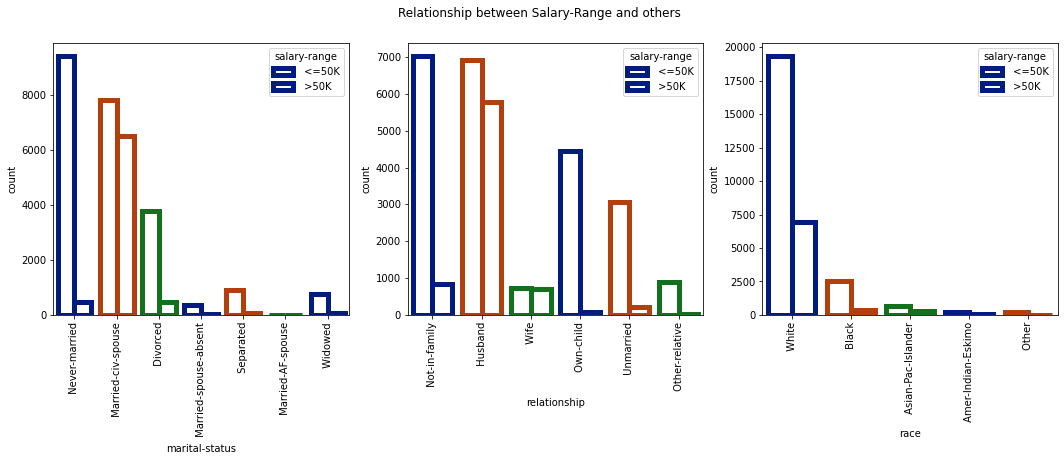

In [ ]:
from matplotlib import style
import warnings
with warnings.catch_warnings():
  warnings.simplefilter("ignore")
  fig, ax = plt.subplots(1,3,figsize=(18, 5))
  sns.countplot(ax=ax[0], x = 'marital-status', hue='salary-range',data=df,facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3))
  sns.countplot(ax=ax[1], x='relationship', hue='salary-range', data=df,facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3))
  sns.countplot(ax=ax[2], x='race', hue='salary-range',data=df,facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3))
  fig.suptitle('Relationship between Salary-Range and others')
  ax[0].tick_params(axis='x', rotation=90)
  ax[1].tick_params(axis='x', rotation=90)
  ax[2].tick_params(axis='x', rotation=90)
  print(df['race'].value_counts())
  print(df['relationship'].value_counts())
  print(df['marital-status'].value_counts())
  plt.show()


### Pre processing

In [ ]:
print("Salary ranges are :-",df["salary-range"].value_counts())
below_50K = df[df["salary-range"] == " <=50K"].sample(7841)
print("Shape for below 50,000 :-",below_50K.shape)
above_50K = df[df["salary-range"] == " >50K"]
print("Shape for above 50,000 :-",above_50K.shape)
df.head()

Salary ranges are :-  <=50K    23054
 >50K      7650
Name: salary-range, dtype: int64
Shape for below 50,000 :- (7841, 15)
Shape for above 50,000 :- (7650, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary-range
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df = pd.concat([above_50K, below_50K])
a=df.copy()
df["salary-range"].replace({' <=50K':0," >50K":1 },inplace=True)
df["salary-range"].value_counts()
df["education"] = df["education"].astype('category')
df["marital-status"] = df["marital-status"].astype('category')
df["occupation"] = df["occupation"].astype('category')
df["relationship"] = df["relationship"].astype('category')
df["race"] = df["race"].astype('category')
df["sex"] = df["sex"].astype('category')
df["native-country"] = df["native-country"].astype('category')
df["workclass"] = df["workclass"].astype('category')
df_n = df.copy()
df.dtypes
print(df['hours-per-week'].value_counts())
df=pd.get_dummies(df,columns=["marital-status"])
df=pd.get_dummies(df,columns=["relationship"])
df=pd.get_dummies(df,columns=["race"])
df=pd.get_dummies(df,columns=["sex"])
df=pd.get_dummies(df,columns=["native-country"])
df=pd.get_dummies(df,columns=["workclass"])


40    7033
50    1812
45    1039
60     899
35     529
      ... 
97       1
89       1
1        1
95       1
86       1
Name: hours-per-week, Length: 87, dtype: int64


## SCATTER MATRIX PLOT



In [ ]:
import plotly
import plotly.express as px
import plotly.io as pio
import matplotlib
fig = px.scatter_matrix(a,dimensions = a[['education', "occupation", 'hours-per-week', 'capital-gain', 'salary-range']],width=1200, height=1050,color_discrete_sequence=['green'])
fig.update_traces(diagonal_visible=True)
fig.update_layout(title="Scatter Plot Matrix Representing Salary-Range , Capital-Gain ,Hours-Per-Week, Occupation , Education ",font=dict(family="sans-serif",size=14,color="#065535"))
fig.show()



## PARALLEL COORDINATE PLOT


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
Parallel_Coordinate_Plot_Frame = df[['capital-gain', 'age', 'capital-loss','education-num','salary-range']].copy()
Parallel_Coordinate_Plot_Frame=Parallel_Coordinate_Plot_Frame.sample(1000)
parallel_coordinate_line  = dict(color = Parallel_Coordinate_Plot_Frame['salary-range'],colorscale = [[0,'#065535'],[1,'#d70071']])
fig = go.Figure(data=go.Parcoords(line = parallel_coordinate_line,dimensions = list([dict(range = [0,150000],label = 'capital-gain', values = Parallel_Coordinate_Plot_Frame['capital-gain']),dict(range = [0,100],label = 'age', values = df['age']),dict(range = [0,18],label = 'education-num', values = Parallel_Coordinate_Plot_Frame['education-num']),dict(range = [0,6000],label = 'capital-loss', values = Parallel_Coordinate_Plot_Frame['capital-loss']),dict(range = [0,1],tickvals = [0,1],ticktext = ['<=50K', '>50K'],label = 'salary-range', values = Parallel_Coordinate_Plot_Frame['salary-range'])])))
fig.update_layout(title=" Parallel Coordinate Plot Representing Salary Based On Age , Capital and Education ",font=dict(family="sans-serif",size=12,color="Black"))
fig.show()


##Line Chart


In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
df2=pd.DataFrame({'hours-per-week':df.loc[df['salary-range'] == 1]['hours-per-week'].value_counts().index,'population':df.loc[df['salary-range'] == 1]['hours-per-week'].value_counts(),'salary':'>50K'}).sort_values(by=['hours-per-week'])
df3 = df2.append(pd.DataFrame({'hours-per-week':df.loc[df['salary-range'] == 0]['hours-per-week'].value_counts().index,'population':df.loc[df['salary-range'] == 0]['hours-per-week'].value_counts(),'salary':'<=50K'})
.sort_values(by=['hours-per-week']))
fig = px.line(df3, y="hours-per-week", x="population",  color='salary', title='Line Chart Plot Representing Salary vs Hours-Per-Week')
fig.show()